In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [3]:
pd.set_option('display.max_colwidth', -1) 
df_raw_data = pd.read_csv('Data\webmd.csv')

In [4]:
len(df_raw_data)

362806

In [5]:
df_raw_data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me. When I first began using this drug some years ago - tiredness as a problem but is not currently.,5,Male,"Drowsiness, dizziness , dry mouth /nose/throat, headache , upset stomach , constipation , or trouble sleeping may occur.",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurting it went away after taking the medicine,5,Female,"Drowsiness, dizziness , dry mouth /nose/throat, headache , upset stomach , constipation , or trouble sleeping may occur.",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to over \n100?,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,01/06/2009,warfarin (bulk) 100 % powder,144731,1,1,"My grandfather was prescribed this medication (Coumadin) to assist in blood thinning due to a heart and thyroid condition. His primary doctor was aware that he was on an aspirin regiment and still prescribed this medicine, it caused his blood to thin out to much and he ended up internally bleeding to death. If you are going to take this medicine please ask your doctors about possible side effects or drug interactions.",1,Male,,1


In [6]:
df_ratings = df_raw_data[['EaseofUse', 'Effectiveness', 'Satisfaction']]

In [7]:
corr = df_ratings.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'max-width': '500px', 'font-size': '40pt'})

,EaseofUse,Effectiveness,Satisfaction
EaseofUse,1,0.552242,0.563748
Effectiveness,0.552242,1,0.793221
Satisfaction,0.563748,0.793221,1


Text(0, 0.5, 'label')

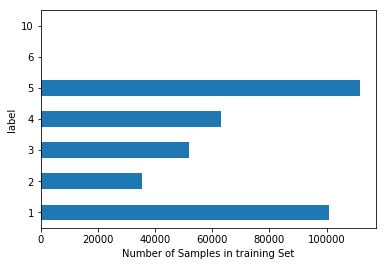

In [8]:
ax = df_ratings['Satisfaction'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('label')

Text(0, 0.5, 'label')

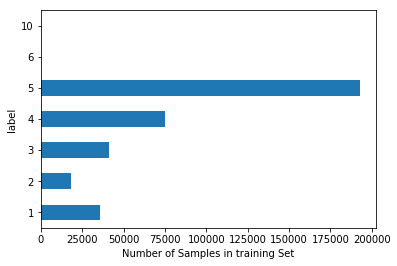

In [9]:
ax = df_ratings['EaseofUse'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('label')

Text(0, 0.5, 'label')

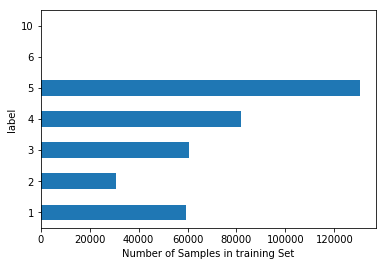

In [10]:
ax = df_ratings['Effectiveness'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('label')

In [11]:
df_raw_data.isnull().sum()

Age              0 
Condition        0 
Date             0 
Drug             0 
DrugId           0 
EaseofUse        0 
Effectiveness    0 
Reviews          37
Satisfaction     0 
Sex              0 
Sides            0 
UsefulCount      0 
dtype: int64

Set blank space entires to NaN

In [12]:
df_raw_data = df_raw_data.replace(r'^\s*$', np.nan, regex = True )

In [13]:
df_raw_data.isnull().sum()

Age              12202
Condition        43   
Date             0    
Drug             0    
DrugId           0    
EaseofUse        0    
Effectiveness    0    
Reviews          41883
Satisfaction     0    
Sex              26537
Sides            17460
UsefulCount      0    
dtype: int64

Drop entries with no reviews

In [14]:
df_drop_na = df_raw_data[~df_raw_data['Reviews'].isnull()]
df_drop_na.isnull().sum()

Age              8748 
Condition        34   
Date             0    
Drug             0    
DrugId           0    
EaseofUse        0    
Effectiveness    0    
Reviews          0    
Satisfaction     0    
Sex              22428
Sides            15598
UsefulCount      0    
dtype: int64

In [15]:
len(df_drop_na)

320923

In [16]:
cols = list(df_drop_na)
for col in cols:
    print('{:<13} {:<10}'.format(col, len(df_drop_na[col].unique())))

Age           12        
Condition     1734      
Date          4524      
Drug          6630      
DrugId        6124      
EaseofUse     7         
Effectiveness 7         
Reviews       250149    
Satisfaction  7         
Sex           3         
Sides         1630      
UsefulCount   148       


In [17]:
for col in cols:
    print(df_drop_na[col].value_counts(),'\n')

45-54         71161
55-64         66295
35-44         49287
25-34         45690
65-74         35486
19-24         22779
75 or over    12415
13-18         6455 
07-Dec        1446 
03-Jun        709  
0-2           452  
Name: Age, dtype: int64 

Other                                                                                         45769
Pain                                                                                          20377
High Blood Pressure                                                                           19408
Depression                                                                                    12697
Birth Control                                                                                 11941
Neuropathic Pain                                                                              7604 
Chronic Trouble Sleeping                                                                      6516 
Type 2 Diabetes Mellitus                              

Name: DrugId, Length: 6124, dtype: int64 

5     169888
4     64602 
3     35917 
1     34129 
2     16384 
6     2     
10    1     
Name: EaseofUse, dtype: int64 

5     116518
4     69847 
1     56134 
3     51323 
2     27098 
6     2     
10    1     
Name: Effectiveness, dtype: int64 

good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Examine entries with same reviews for possibility of non-genuine or suspicious data points. 

In [18]:
df_drop_na['Reviews'].value_counts()

good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [19]:
rep_rev = list(df_drop_na['Reviews'].value_counts().index[0:10])
rep_rev

['good',
 'this treatment is awsome.  I love drugs.',
 'This drug is awesome.  I love drugs.',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306,\nCall/Text:+1(775)7735306,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16) Discreet Delivery',
 'ok',
 'none',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It  was nice to have some from them, I just hit them at.\nWhatsApp only: +1(252)4601212,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16)\nDiscreet Delivery\n',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306, Call/Text:+1(775)7735306, Wickr or Kik: peterking2014. Email: peterkings2014@gmail.com. Message cod

In [20]:
for rev in rep_rev:
    s = '\nNumber of entries with review "{}": {} \n'
    print(s.format(rev, len(df_drop_na[df_drop_na['Reviews'] == rev])))
    
    for col in cols:
        s = 'Number of unique items in {:<16}{}'
        print(s.format(col, len(df_drop_na[df_drop_na['Reviews'] == rev][col].value_counts())))
    


Number of entries with review "good": 183 

Number of unique items in Age             10
Number of unique items in Condition       73
Number of unique items in Date            134
Number of unique items in Drug            144
Number of unique items in DrugId          112
Number of unique items in EaseofUse       5
Number of unique items in Effectiveness   5
Number of unique items in Reviews         1
Number of unique items in Satisfaction    5
Number of unique items in Sex             2
Number of unique items in Sides           91
Number of unique items in UsefulCount     12

Number of entries with review "this treatment is awsome.  I love drugs.": 172 

Number of unique items in Age             1
Number of unique items in Condition       1
Number of unique items in Date            4
Number of unique items in Drug            167
Number of unique items in DrugId          160
Number of unique items in EaseofUse       1
Number of unique items in Effectiveness   1
Number of unique items i

In [21]:
df_good = df_drop_na[df_drop_na['Reviews'] == 'good']
df_drugs_are_awesome = df_drop_na[df_drop_na['Reviews'] == 'this treatment is awsome.  I love drugs.']

In [22]:
df_drugs_are_awesome

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
4147,25-34,Osteoporosis,3/16/2010,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,Male,"Dizziness , lightheadedness , drowsiness, or headache may occur as your body adjusts to the medication . Dry cough may also occur.",0
6181,25-34,Osteoporosis,3/15/2010,lopressor ampul,6878,4,3,this treatment is awsome. I love drugs.,2,Male,NaN,0
7554,25-34,Osteoporosis,3/16/2010,lithostat,9290,4,3,this treatment is awsome. I love drugs.,2,Male,"Headache , nausea , vomiting , stomach upset, unusual hair loss , or loss of appetite may occur.",0
19282,25-34,Osteoporosis,3/15/2010,lincomycin hcl vial,5641,4,3,this treatment is awsome. I love drugs.,2,Male,"Nausea , vomiting , diarrhea , or headache may occur.",0
22344,25-34,Osteoporosis,3/16/2010,"latisse drops, with applicator",151740,4,3,this treatment is awsome. I love drugs.,2,Male,Eye redness/discomfort/ itching /dryness or eyelid redness may occur.,2
35711,25-34,Osteoporosis,3/16/2010,l-phenylalanine,4453,4,3,this treatment is awsome. I love drugs.,2,Male,NaN,0
36663,25-34,Osteoporosis,3/15/2010,levemir vial,95095,4,3,this treatment is awsome. I love drugs.,2,Male,"Injection site reactions (such as pain, redness, irritation) and swelling of the hands/feet may occur.",0
36865,25-34,Osteoporosis,3/16/2010,levetiracetam tablet for suspension,17855,4,3,this treatment is awsome. I love drugs.,2,Male,"Drowsiness, dizziness , unusual tiredness, or weakness may occur.",0
37017,25-34,Osteoporosis,3/16/2010,levetiracetam,17855,4,3,this treatment is awsome. I love drugs.,2,Male,"Drowsiness, dizziness , unusual tiredness, or weakness may occur.",0
38306,25-34,Osteoporosis,3/16/2010,wal-phed pe,150355,4,3,this treatment is awsome. I love drugs.,2,Male,"Drowsiness, dizziness , blurred vision , upset stomach , nausea , nervousness, or dry mouth /nose/throat may occur.",0


In [23]:
SMALL_SIZE = 40
MEDIUM_SIZE = 44
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [24]:
df_drugs_are_awesome['Satisfaction'].value_counts(sort=False)

2    172
Name: Satisfaction, dtype: int64

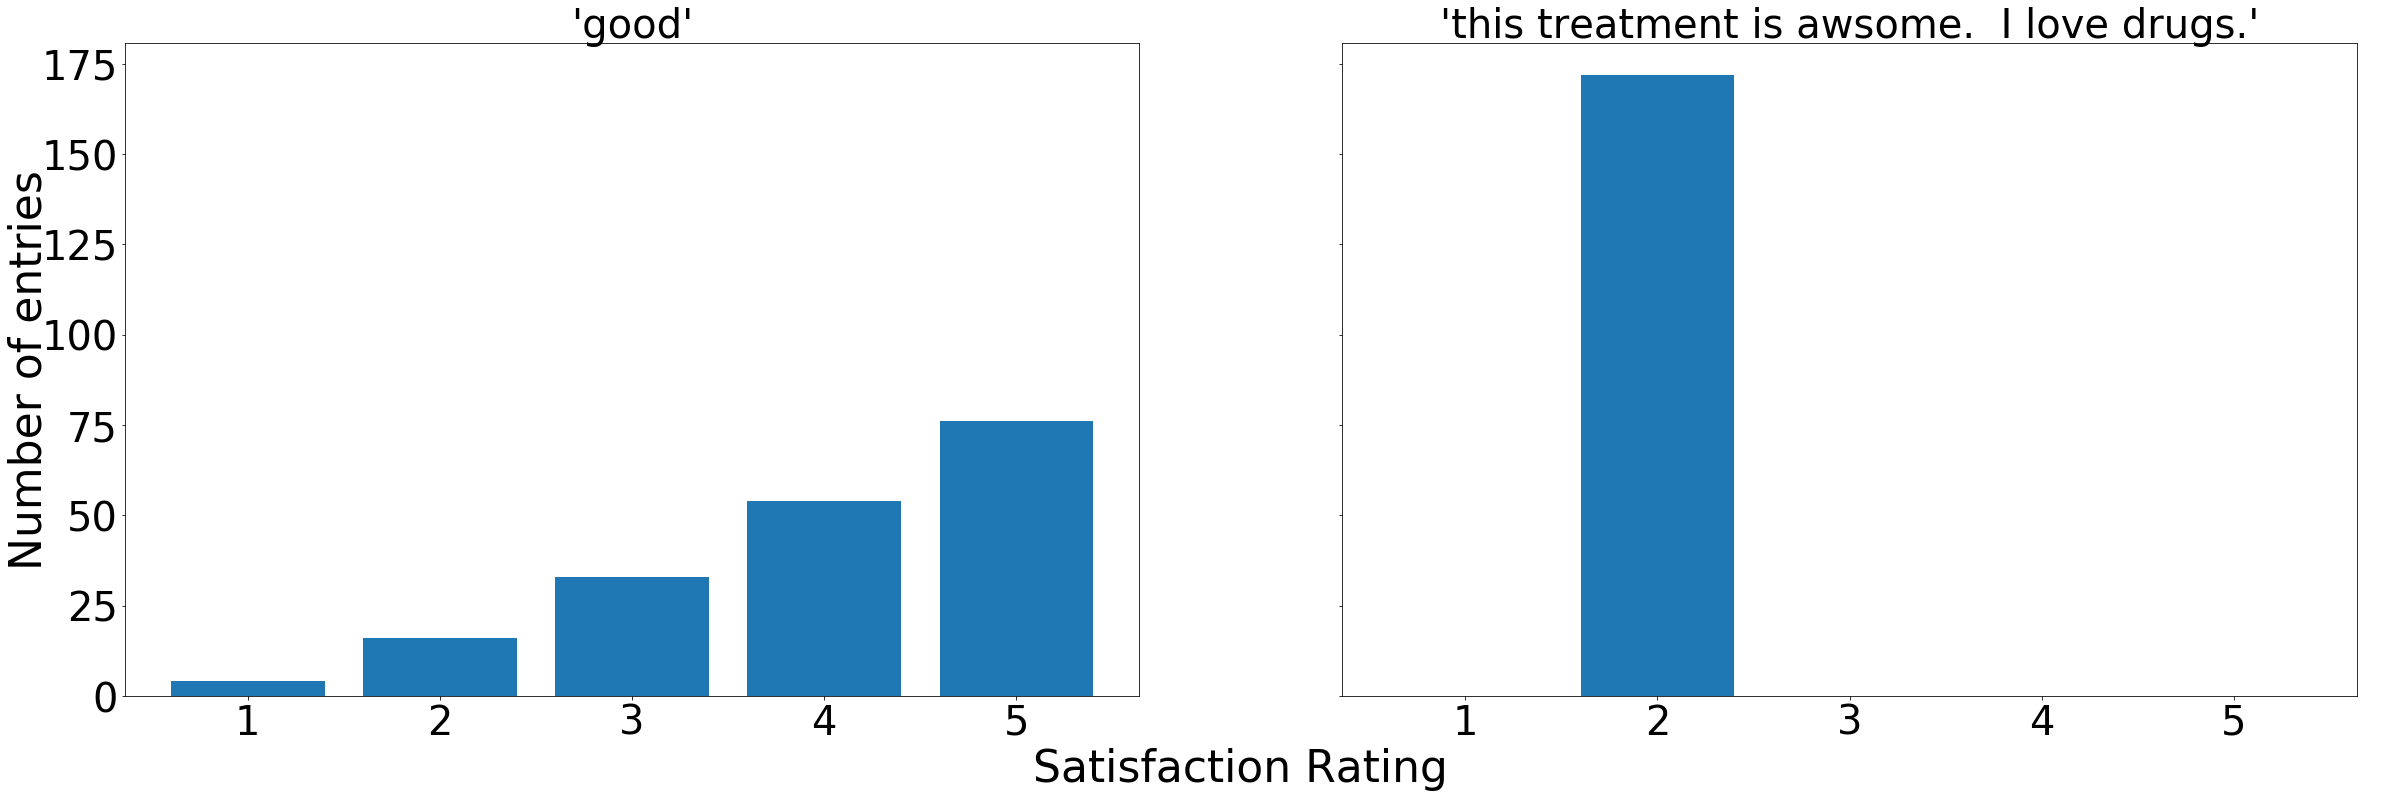

In [25]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=False,figsize=(40,12))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Satisfaction Rating")
plt.ylabel("Number of entries")
x = [1,2,3,4,5]

axs[0].bar(x,df_good['Satisfaction'].value_counts(sort = False))
axs[1].bar(x,[0,df_drugs_are_awesome['Satisfaction'].value_counts(sort=False),0,0,0])

axs[0].set_xticks([1,2,3,4,5])
axs[1].set_xticks([1,2,3,4,5])

axs[0].title.set_text('\'good\'') 
axs[1].title.set_text('\'this treatment is awsome.  I love drugs.\'') 

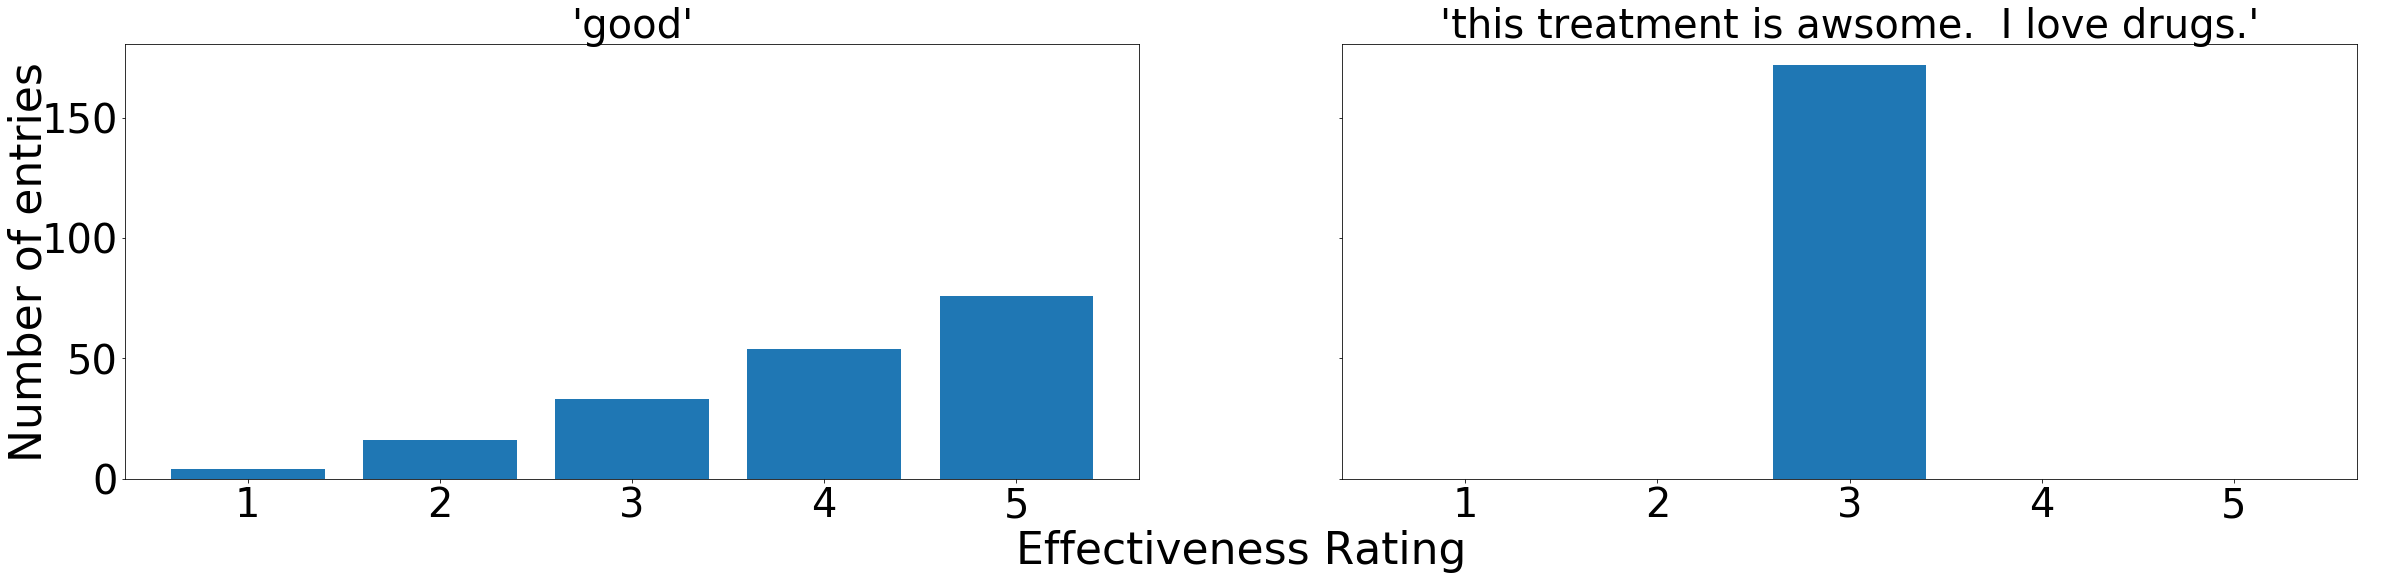

In [26]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=False,figsize=(40,8))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Effectiveness Rating")
plt.ylabel("Number of entries")
x = [1,2,3,4,5]

axs[0].bar(x,df_good['Satisfaction'].value_counts(sort = False))
axs[1].bar(x,[0,0,df_drugs_are_awesome['Effectiveness'].value_counts(sort=False),0,0])

axs[0].set_xticks([1,2,3,4,5])
axs[1].set_xticks([1,2,3,4,5])

axs[0].title.set_text('\'good\'') 
axs[1].title.set_text('\'this treatment is awsome.  I love drugs.\'') 

We will drop the entries that have clearly been falsified, as they have the same exact review and ratings for hundereds of different drugs in the data set, all done within a few days of each other. Some are also clearly advertisements and not useful to the model. 

In [235]:
remove = [rep_rev[i] for i in [1,2,3,6,7]]
remove

['this treatment is awsome.  I love drugs.',
 'This drug is awesome.  I love drugs.',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306,\nCall/Text:+1(775)7735306,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16) Discreet Delivery',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It  was nice to have some from them, I just hit them at.\nWhatsApp only: +1(252)4601212,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16)\nDiscreet Delivery\n',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306, Call/Text:+1(775)7735306, Wickr or Kik: peterking2014. Email: peterkings2014@gmail.com. Message code: (Med16) Discreet Deliv

We will also search the rest of the reviews for ones resembling the advertisements seen above. 

In [19]:
df_drop_na[df_drop_na['Reviews'].str.contains(r'WhatsApp') == True ]['Reviews'].value_counts()

No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306,\nCall/Text:+1(775)7735306,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16) Discreet Delivery                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [20]:
advert = list(df_drop_na[df_drop_na['Reviews'].str.contains(r'WhatsApp') == True ]['Reviews'].unique())

In [21]:
remove += advert 
remove

['this treatment is awsome.  I love drugs.',
 'This drug is awesome.  I love drugs.',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306,\nCall/Text:+1(775)7735306,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16) Discreet Delivery',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It  was nice to have some from them, I just hit them at.\nWhatsApp only: +1(252)4601212,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16)\nDiscreet Delivery\n',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306, Call/Text:+1(775)7735306, Wickr or Kik: peterking2014. Email: peterkings2014@gmail.com. Message code: (Med16) Discreet Deliv

We will also examine reviews with very few characters as many will not have useful information for the model

In [22]:
print([x for x in df_drop_na['Reviews'].unique() if len(x) < 3])

['ok', 'OK', 'T', 'ed', '.', '?', '/', '??', 'J', 'NV', 'Na', 'he', 'no', 'Ok', 'n', 'I', 'It', 'na', '0', '..', 'ad', 'xx', 'M', 'ng', '1', 'd', '?\n', 'X', 'e', 'nn', 'hi', 'n9', '3', 'ju', ':)', 'ED', ',']


Other than 'ok', 'OK' and 'Ok', none of the other reviews offer any information that would be useful to the model, so we will drop them

In [23]:
useful = ['ok','OK','Ok']

We also look at reviews with 3 characters 

In [24]:
print([x for x in df_drop_na['Reviews'].unique() if len(x) == 3])

['New', 'new', 'flu', 'omg', 'Mmm', 'fun', 'dgs', 'ed.', 'Nna', 'bad', 'yum', 'ddd', 'pie', 'OK?', 'nil', 'ADD', 'RLS', 'sex', 'Eh.', 'nad', 'chf', 'abc', 'rsl', 'ok\n', 'tst', 'yes', 'Lit', 'xbe', 'wow', 'no\n', 'ibs', '123', 'hbp', 'yea', 'M/s', 'PVC', 'lbp', 'std', 'STD', 'add', 'hiv', 'Yay', 'No.', 'hjk']


In [25]:
useful += ['bad','yum','OK?', 'ok\n', 'Yay']
print(useful)

['ok', 'OK', 'Ok', 'bad', 'yum', 'OK?', 'ok\n', 'Yay']


And also four charcter reviews

In [26]:
print([x for x in df_drop_na['Reviews'].unique() if  len(x) == 4])

['fine', 'good', 'rash', 'none', 'Agin', 'NONE', 'o.k.', 'GOOD', 'test', 'Blah', 'jkji', 'goog', 'Cool', 'okay', 'info', 'pain', 'gout', 'fair', 'PAIN', 'Good', 'dont', 'Fine', 'xxxx', 'adhd', 'kewl', 'poor', 'None', 'acne', 'RLS\n', 'A ok', 'WOW!', 'Fast', 'RASE', 'Burn', 'ptsd', 'like', 'pmdd', 'calm', 'PTSD', 'rls\n', 'need', 'well', 'itch', 'ok \n', 'M.S.', 'arun', 'easy', 'FINE', 'godd', 'dgff', 'abcd', 'asdf', 'yea!', 'Poor', 'LAME', 'weak', 'ADHD', 'kjhk', 'THIS', 'Rash', 'A OK', 'slow', 'n//a', 'WOW\n', 'AES!']


In [27]:
useful += ['fine','good','o.k.','GOOD','Cool','okay','pain','fair','PAIN','Good','Fine','poor','A ok','WOW!','well','ok \n','Fine','Poor','LAME','weak','A OK','WOW\n']
print(useful)

['ok', 'OK', 'Ok', 'bad', 'yum', 'OK?', 'ok\n', 'Yay', 'fine', 'good', 'o.k.', 'GOOD', 'Cool', 'okay', 'pain', 'fair', 'PAIN', 'Good', 'Fine', 'poor', 'A ok', 'WOW!', 'well', 'ok \n', 'Fine', 'Poor', 'LAME', 'weak', 'A OK', 'WOW\n']


In [28]:
remove += [x for x in df_drop_na['Reviews'].unique() if  len(x) <= 4 and x not in useful]
remove

['this treatment is awsome.  I love drugs.',
 'This drug is awesome.  I love drugs.',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306,\nCall/Text:+1(775)7735306,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16) Discreet Delivery',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It  was nice to have some from them, I just hit them at.\nWhatsApp only: +1(252)4601212,\nWickr or Kik: peterking2014.\nEmail: peterkings2014@gmail.com.\nMessage code: (Med16)\nDiscreet Delivery\n',
 'No Script or health Insurance needed to place and order with 10% discount for all purchased. It was nice to have some from them, I just hit them at. WhatsApp only:+1(775)7735306, Call/Text:+1(775)7735306, Wickr or Kik: peterking2014. Email: peterkings2014@gmail.com. Message code: (Med16) Discreet Deliv

In [29]:
df_drop_bad = df_drop_na[~df_drop_na['Reviews'].isin(remove)]

In [30]:
len(df_drop_bad)

320022

Also many drug ID's correspond to several drugs, so we will investigate these drug ID's for duplication

In [31]:
ids  = list(df_drop_bad['DrugId'].unique())

drugs_for_id = {}
for id in ids:
    drugs_for_id[id] = list(df_drop_bad[df_drop_bad['DrugId'] == id ]['Drug'].unique())
    
drugs_for_id

{146724: ['25dph-7.5peh'],
 144731: ['warfarin (bulk) 100 % powder'],
 163180: ['wymzya fe'],
 9800: ['12 hour nasal relief spray, non-aerosol'],
 12112: ['pyrogallol crystals'],
 164750: ['lyza'],
 154120: ['lysteda'],
 170586: ['pyrithione zinc shampoo'],
 163405: ['lysine acetate 4,000 mg oral powder packet'],
 167493: ['lynparza tablet', 'lynparza'],
 75352: ['lymphazurin vial'],
 93965: ['lyrica'],
 4494: ['lysodren'],
 87740: ['lydia pinkham herbal'],
 8841: ['pyrithione zinc bar'],
 21490: ['lycopene'],
 164519: ['pyrilamine-chlophedianol liquid'],
 4248: ['pyrilamine maleate powder'],
 5427: ['pyridoxine hcl'],
 8840: ['pyridostigmine bromide solution'],
 3753: ['pyridostigmine bromide'],
 152058: ['pyridostigmine bromide (bulk) 100 % powder'],
 9999: ['pyrantel pamoate suspension'],
 5661: ['pyridium'],
 147953: ['pylera'],
 17045: ['luxiq foam'],
 170669: ['luxamend cream'],
 76848: ['lmx 5 cream'],
 76847: ['lmx 4 cream'],
 3468: ['loestrin'],
 177356: ['lo-zumandimine (28) 

In [32]:
len(drugs_for_id)

6095

In [33]:
dup = [x for x in ids if len(drugs_for_id[x]) > 1]
print(dup)

[167493, 11594, 7286, 7319, 164437, 8892, 76548, 73, 8555, 4789, 5887, 6873, 18168, 159426, 8532, 10414, 2617, 90542, 1591, 92199, 11450, 4582, 17281, 5600, 8486, 3367, 1433, 6865, 1058, 20417, 14495, 17855, 17082, 1514, 6889, 54160, 75017, 156084, 1527, 12106, 8893, 8684, 145150, 8437, 6112, 16239, 9845, 144614, 1025, 1700, 166829, 5173, 11643, 1705, 4082, 6055, 9347, 166478, 6928, 6231, 64869, 12067, 12252, 8681, 75256, 75251, 149079, 156542, 17762, 16910, 76794, 3766, 1644, 327, 6478, 93220, 3743, 151017, 4068, 11285, 78017, 12114, 18536, 9730, 2671, 6073, 9866, 77932, 8946, 63866, 13706, 7722, 150393, 20222, 3841, 10404, 8838, 77793, 19981, 11422, 1011, 6007, 13557, 6307, 4908, 831, 3680, 522, 150903, 19745, 5964, 1821, 16241, 145158, 94097, 10346, 4159, 676, 145142, 6968, 1050, 6969, 4468, 17713, 4091, 149321, 8425, 156263, 6283, 7835, 89073, 21961, 76313, 93749, 1088, 4689, 3336, 163862, 3409, 4184, 4501, 75277, 5254, 3065, 9982, 1556, 77537, 197, 148063, 17701, 6485, 341, 18201,

For each ID in that corresponds to more than one drug name we will compare the reviews under each different drug name to the reviews under the other drug names

In [34]:
for id in dup:
    l =[]
    for drug in drugs_for_id[id]:
        l.append(df_drop_bad[df_drop_bad['Drug'] == drug ]['Reviews'].values)
    
    for a, b in itertools.combinations(l, 2):
        a_set = set(a)
        b_set = set(b)
        if a_set != b_set: 
            print('Difference')
            break
    else:
        print('Identical')
        continue

Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical
Identical


Clearly all the reviews are identical up to a set of unique reviews. Therfore we just pick one set of reviews per drug ID and discard the rest. 

In [35]:
remove = []

for id in dup:
    l = drugs_for_id[id]
    for drug in l[1:]:
        remove.append(drug)
        
print(remove)

['lynparza', 'lovastatin', 'loteprednol etabonate drops, suspension', 'loteprednol etabonate drops, gel', 'lotemax drops, gel', 'lorcaserin tablet, extended release 24 hr', 'lorazepam', 'loratadine d', 'loratadine', 'loprox cream', 'loperamide', 'lithium carbonate er', 'lisinopril', 'linezolid', 'linagliptin-metformin tablet', 'lidocaine cream topical local anesthetics', 'lidocaine adhesive patch, medicated topical local anesthetics', 'lidocaine hcl solution, non-', 'lidocaine 2 % mucosal solution', 'lice treatment topical liquid', 'lice treatment liquid scabicides & pediculocides', 'lupron depot (3 month) 22.5 mg intramuscular syringe kit', 'lupron depot 7.5 mg intramuscular syringe kit', 'lanthanum 1,000 mg oral powder packet', 'lansoprazole', 'lamotrigine odt', 'lamotrigine er', 'lamotrigine', 'lamisil at cream', 'lamivudine', 'lamivudine tablet', 'lamictal', 'lactulose', 'levothyroxine solution', 'lactinex', 'levonorgestrel-eth estradiol', 'levonorgestrel-eth estradiol tablet contr

In [36]:
df_drop_dup = df_drop_bad[~df_drop_bad['Drug'].isin(remove)]
len(df_drop_dup)

252697

Now finally we will examine wether any of the remaining entries are complete duplicates of each other

In [37]:
for col in cols:
    print(df_drop_dup[col].value_counts(),'\n')

45-54         55356
55-64         51796
35-44         38706
25-34         36342
65-74         27814
19-24         18976
75 or over    9628 
13-18         5323 
07-Dec        1107 
03-Jun        538  
0-2           290  
Name: Age, dtype: int64 

Other                                                             36532
High Blood Pressure                                               15143
Pain                                                              12290
Birth Control                                                     11899
Depression                                                        11202
Chronic Trouble Sleeping                                          5475 
Attention Deficit Disorder with Hyperactivity                     4895 
Neuropathic Pain                                                  4490 
Type 2 Diabetes Mellitus                                          4197 
Bipolar Depression                                                3732 
Major Depressive Disorder         

good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [38]:
x = df_drop_dup['Reviews'].value_counts().values[:100]
x

array([141,  65,  34,  31,  29,  29,  28,  27,  27,  27,  27,  27,  27,
        27,  27,  27,  27,  27,  27,  27,  27,  27,  27,  27,  27,  27,
        27,  27,  27,  27,  27,  26,  24,  24,  22,  21,  20,  18,  17,
        15,  14,  14,  13,  13,  12,  12,  12,  12,  11,  11,  11,  10,
        10,  10,   9,   9,   9,   9,   9,   9,   9,   9,   8,   8,   8,
         8,   8,   8,   8,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   5,   5,   5,   5], dtype=int64)

Looking at the reviews it is clear that some entries have bee duplicated 27 times, as this value count occurs too often, and for long reviews unliekly to be repeated by coincedence. 

In [39]:
dup_rev = [df_drop_dup['Reviews'].value_counts().index[i] for i in range(7,31)]
dup_rev

['I have bad dreams that I am losing my breath when I take this medication. ',
 'Sinusitis, with a cough, after h1n1 flu. It works, saved my life from h1 N1 flu. And other flu.',
 'its effective to releive depression and weight related issues',
 'I was prescribed this medication for congestion, stuffy nose, sinus drainage, blocked ears, etc. I have been taking it for three full days now and do not see any relief in symptoms. I take it three times per day. ',
 'I have just been prescribed this and want to check it out.',
 'This is a test, please review.',
 'No side effects, but it did not help reduce the cough or phelgm.  After 5 days I was just as bad as when I started taking the med.  ',
 'cleared me right up even with my throat hurting it went away after taking the medicine',
 'This product made my feet ache after about a month. The entire sole of the foot.   Stopped taking it it went away. \n\nI did not loose belly fat and do not recommend this for weight loss.  \n\nI took it becaus

In [40]:
remove=[]

for rev in dup_rev:
    for i in range(1,27):
        remove.append(df_drop_dup.index[df_drop_dup['Reviews'] == rev][i])

In [41]:
remove

[42286,
 252082,
 252187,
 252334,
 252470,
 252534,
 252643,
 252658,
 252701,
 252712,
 252758,
 252772,
 252816,
 252846,
 252860,
 252888,
 252919,
 252949,
 252976,
 253005,
 253035,
 253065,
 253095,
 253122,
 253153,
 302122,
 42174,
 252057,
 252155,
 252261,
 252447,
 252511,
 252635,
 252652,
 252695,
 252704,
 252749,
 252762,
 252807,
 252836,
 252851,
 252883,
 252909,
 252938,
 252971,
 252996,
 253010,
 253055,
 253084,
 253116,
 253145,
 301115,
 42344,
 252118,
 252216,
 252371,
 252566,
 252610,
 252668,
 252681,
 252723,
 252739,
 252780,
 252798,
 252825,
 252870,
 252899,
 252930,
 252959,
 252986,
 253026,
 253046,
 253074,
 253103,
 253132,
 253161,
 253174,
 302196,
 42240,
 252076,
 252171,
 252315,
 252457,
 252517,
 252639,
 252648,
 252693,
 252708,
 252754,
 252766,
 252811,
 252840,
 252855,
 252881,
 252913,
 252943,
 252969,
 253002,
 253028,
 253059,
 253089,
 253114,
 253143,
 301132,
 42296,
 252089,
 252189,
 252327,
 252478,
 252530,
 252645,
 25265

In [42]:
df_drop_dup_= df_drop_dup[~df_drop_dup.index.isin(remove)]
len(df_drop_dup_)

252073

In [43]:
df_drop_dup_['Satisfaction'].value_counts()

1    77154
5    76312
4    40587
3    33616
2    24403
6    1    
Name: Satisfaction, dtype: int64

Then we drop an entry that has an invalid value for satisfaction

In [47]:
df = df_drop_dup_[(df_drop_dup_['Satisfaction'] != 6)]

Text(0, 0.5, 'label')

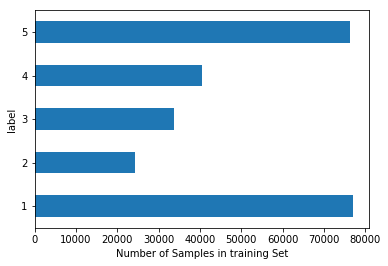

In [45]:
ax = df['Satisfaction'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('label')

In [74]:
df['Satisfaction'].value_counts(normalize=True)

1    0.306079
5    0.302739
4    0.161014
3    0.133359
2    0.096810
Name: Satisfaction, dtype: float64

In [68]:
# Class count
count_1, count_2, count_3, count_4, count_5= df['Satisfaction'].value_counts()
count_min = min(count_1, count_2, count_3, count_4, count_5)

# Divide by class
df_1 = df[df['Satisfaction'] == 1]
df_2 = df[df['Satisfaction'] == 2]
df_3 = df[df['Satisfaction'] == 3]
df_4 = df[df['Satisfaction'] == 4]
df_5 = df[df['Satisfaction'] == 5]

# under sampling
df_1_under = df_1.sample(count_min)
df_2_under = df_2.sample(count_min)
df_3_under = df_3.sample(count_min)
df_4_under = df_4.sample(count_min)
df_5_under = df_5.sample(count_min)
df = df_1_under.append(df_2_under.append(df_3_under.append(df_4_under.append(df_5_under))))
df = df.sample(frac=1)

# cleaned data entries
df.shape[0]

122015

Text(0, 0.5, 'label')

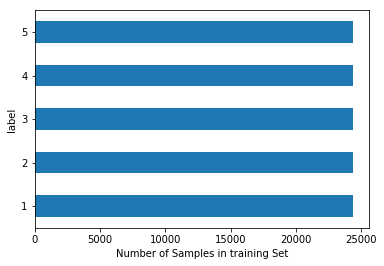

In [70]:
ax = df['Satisfaction'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('label')